In [ ]:
!pip install tensorflow==2.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 112.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 96.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uni

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive'
%cd '/content/drive/My Drive'

Mounted at /content/drive
 archive.zip	     model_ENB1_2.h5    model_INC3_3.h5    model_RN50.h5
'Colab Notebooks'    model_ENB1_ss.h5   model_INC3_4.h5    model_RN50_ss.h5
 dataminingnew.mp4   model_ENB3_2.h5    model_INC3_ss.h5   veri_mad_birles.mp4
 demo		     model_ENB3_ss.h5   model_RN50_2.h5
 effb3_weights.h5    model_INC3_1.h5    model_RN50_3.h5
 model_ENB1_1.h5     model_INC3_2.h5    model_RN50_4.h5
/content/drive/My Drive


In [3]:
!unzip '/content/drive/MyDrive/archive.zip' -d '/content/archive'

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/archive/COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: /content/archive/COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: /content/archive/COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: /content/archive/COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: /content/archive/COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: /content/archive/COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: /content/archive/COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: /content/archive/COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: /content/archive/COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: /content/archive/COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: /content/archive/COVID-19_Radiography_Dat

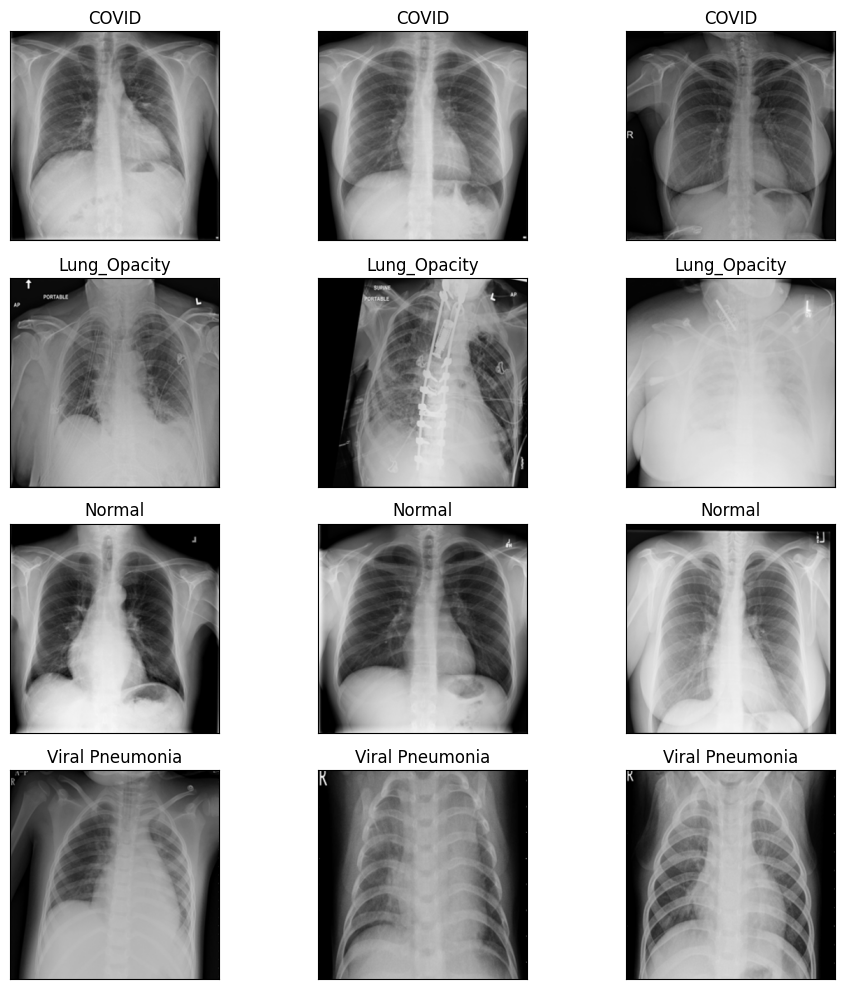

In [ ]:
import os
import random
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import cv2

# Define the path to the directory containing the class folders
path = '/content/archive/COVID-19_Radiography_Dataset'

# Define the names of the class folders
class_names = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

# Create an empty list to store the selected image filenames
selected_files = []

# Loop through each class folder and randomly select 16 image files from the first file in each folder
for class_name in class_names:
    class_path = os.path.join(path, class_name)
    files = os.listdir(class_path)
    file_path = os.path.join(class_path, files[0])
    image_files = os.listdir(file_path)
    selected_files.extend(random.sample(image_files, 3))

# Create a new figure with 4 rows and 4 columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,10))

# Loop through the axes and images, and plot each image on the corresponding axis
for i, ax in enumerate(axes.flat):
    # Get the class name and image filename for this axis
    class_name = class_names[i // 3]
    filename = selected_files[i]
    # Open the image using Cv2
    image = cv2.imread(os.path.join(path, class_name, 'images', filename), cv2.IMREAD_COLOR)
    # Plot the image on the axis
    ax.imshow(image)
    # Remove the axis ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    # Set the title of the axis to the class name
    ax.set_title(class_name)
plt.tight_layout();
# Display the figure
plt.show()

In [4]:
import os
imagePaths = []
for dirname, _, filenames in os.walk('/content/archive/COVID-19_Radiography_Dataset'):
    for filename in filenames:
      if (dirname[-5:] != 'masks' and filename[-3:] == 'png'):
          imagePaths.append(os.path.join(dirname, filename))

In [5]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob

imgSize = 224


X = []
Y = []
hmap = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19', 'Lung_Opacity': 'Opacity'}
for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-3]
    #print(label)
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (imgSize, imgSize))

    X.append(image)
    Y.append(hmap[label])

100%|██████████| 21165/21165 [00:35<00:00, 597.41it/s]


In [6]:
print('Covid-19:',Y.count('Covid-19'))
print('Normal:',Y.count('Normal'))
print('Pneumonia: ',Y.count('Pneumonia'))
print('Lung_Opacity: ',Y.count('Opacity'))

Covid-19: 3616
Normal: 10192
Pneumonia:  1345
Lung_Opacity:  6012


In [7]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
Y = le.fit_transform(Y)
#print(Y)
Y = to_categorical(Y)

(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42)

In [8]:
le.classes_

array(['Covid-19', 'Normal', 'Opacity', 'Pneumonia'], dtype='<U9')

In [ ]:
# Transfer Learning Inceptionv3
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.preprocessing.image import load_img, img_to_array

from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.applications import InceptionV3

Count_of_class = 4

base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg',
)
model_INC3 = Sequential([
  base_model,
  Dense(Count_of_class, activation='softmax')
])

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
model_INC3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 21,810,980
Trainable params: 21,776,548
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)


print(testY)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-3)
Batch_Size = 4
Epoch = 20

model_INC3.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)
H = model_INC3.fit(trainX, trainY, batch_size=Batch_Size, validation_data=(testX, testY),epochs=Epoch)

Epoch 1/20
4233/4233 [==============================] - 287s 56ms/step - loss: 1.1884 - accuracy: 0.4783 - val_loss: 1.7747 - val_accuracy: 0.3884
Epoch 2/20
4233/4233 [==============================] - 239s 56ms/step - loss: 0.9288 - accuracy: 0.6226 - val_loss: 0.8270 - val_accuracy: 0.6856
Epoch 3/20
4233/4233 [==============================] - 238s 56ms/step - loss: 0.6279 - accuracy: 0.7539 - val_loss: 0.7689 - val_accuracy: 0.6969
Epoch 4/20
4233/4233 [==============================] - 237s 56ms/step - loss: 0.4769 - accuracy: 0.8239 - val_loss: 0.3734 - val_accuracy: 0.8592
Epoch 5/20
4233/4233 [==============================] - 236s 56ms/step - loss: 0.3927 - accuracy: 0.8533 - val_loss: 0.4569 - val_accuracy: 0.8266
Epoch 6/20
4233/4233 [==============================] - 237s 56ms/step - loss: 0.3558 - accuracy: 0.8701 - val_loss: 0.3106 - val_accuracy: 0.8859
Epoch 7/20
4233/4233 [==============================] - 236s 56ms/step - loss: 0.3178 - accuracy: 0.8837 - val_loss: 0

In [ ]:
model_INC3.save('model_INC3_ss.h5')

In [ ]:
from tensorflow.keras.models import *
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model= model_INC3

#model= load_model("/content/drive/MyDrive/model_ENB1_2.h5")

predIdxs = model.predict(testX, batch_size=4)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))
print("\n Cohen's Kappa Score: ",cohen_kappa_score(testY.argmax(axis=1), predIdxs))

1059/1059 [==============================] - 17s 15ms/step
              precision    recall  f1-score   support

    Covid-19    0.93399   0.91978   0.92683       723
      Normal    0.90784   0.93768   0.92252      2038
     Opacity    0.88326   0.85536   0.86909      1203
   Pneumonia    0.97610   0.91078   0.94231       269

    accuracy                        0.90952      4233
   macro avg    0.92530   0.90590   0.91519      4233
weighted avg    0.90966   0.90952   0.90933      4233


 Cohen's Kappa Score:  0.8607722317875318


133/133 [==============================] - 11s 70ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

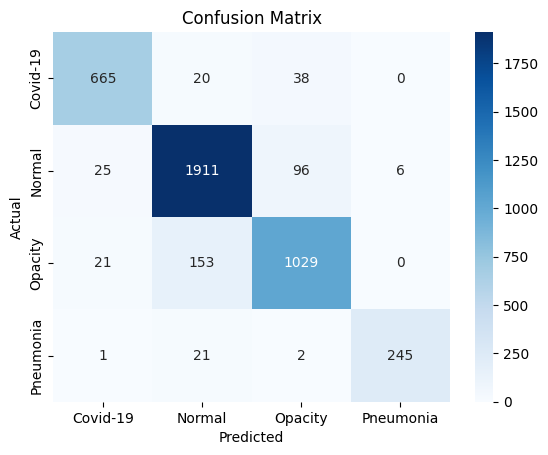

In [ ]:
#Düzenlenecek.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns
plt.figure()

ax = plt.subplot()

ax.set_title('Confusion Matrix')
pred = model.predict(testX)
pred=np.argmax(pred,axis=1)
# pred = model.predict_classes(X_test)
Y_TEST = np.argmax(testY, axis =1)
cm = metrics.confusion_matrix(Y_TEST,pred)
classes=['Covid-19', 'Normal', 'Opacity', 'Pneumonia']
sns.heatmap(cm, annot=True,xticklabels=classes, yticklabels=classes,cmap='Blues',fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show

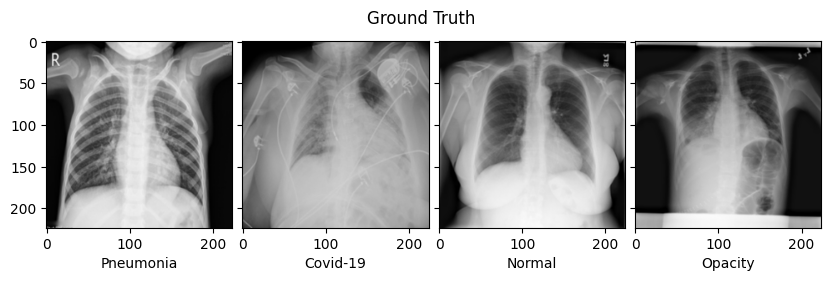

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(10., 10.))
fig.suptitle('Ground Truth', y=0.62)

grid = ImageGrid(fig, 111, # similar to subplot(111)
                 nrows_ncols=(1, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


n_samples = len(testX)

# Rastgele 5 indeks seçer
random_indices = np.random.choice(n_samples, 5, replace=False)

# Rastgele 5 görüntü ve etiketini yazdırır
for ax,index in zip(grid,random_indices):
    ax.imshow(testX[index])
    #ax.axis('off')
    ax.set_xlabel(le.inverse_transform([np.argmax(testY[index], axis=-1, out=None)])[0])


plt.show()

1/1 [==============================] - 0s 24ms/step


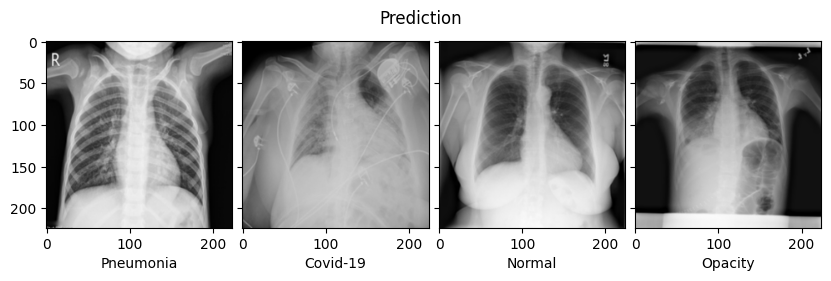

In [ ]:
fig2 = plt.figure(figsize=(10., 10.))
fig2.suptitle('Prediction', y=0.62)

grid2 = ImageGrid(fig2, 111, # similar to subplot(111)
                 nrows_ncols=(1, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax,index in zip(grid2,random_indices):
    ax.imshow(testX[index])
    #ax.axis('off')
    ax.set_xlabel(le.inverse_transform(np.argmax(model.predict(testX[index][None]), axis=1 ))[0])

plt.show()